In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame({
    'juego': ['Juego1', 'Juego2', 'Juego3', 'Juego4', 'Juego5', 'Juego6', 'Juego7', 'Juego8', 'Juego9', 'Juego10'],
    'plataformas': ['PC', 'PS4', 'XBOX', 'SWITCH', 'PC', 'PS4', 'XBOX', 'SWITCH', 'PC', 'PS4'],
    'genero': ['Aventura', 'Accion', 'RPG', 'Deportes', 'Aventura', 'Accion', 'RPG', 'Deportes', 'Aventura', 'Accion']
})

fechas_aleatorias = pd.to_datetime(
    np.random.choice(pd.date_range("2010-01-01", "2023-12-31"), size=10)
)

df['ventas_mundiales'] = np.random.randint(1, 10000001, size=len(df))
df['fecha_lanzamiento']= fechas_aleatorias
df['calificacion'] = np.random.uniform(1, 10, size=len(df)).round(1)

In [5]:
#Se realizo una copia con los valores brindados, para no perder la información original
#por si se ejecuta de nuevo el código para no perder el analisis de las  graficas
df.to_csv('analisis_videojuegos.csv', index=False)
df= pd.read_csv('analisis_videojuegos.csv')

In [112]:
df

,juego,plataformas,genero,ventas_mundiales,fecha_lanzamiento,calificacion,Año_Lanzamiento,year_Lanzamiento,anio,year
0,Juego1,PC,Aventura,7834393,2019-08-18,7.7,2019,2019,2019,2019
1,Juego2,PS4,Accion,3842304,2023-10-26,2.5,2023,2023,2023,2023
2,Juego3,XBOX,RPG,3746974,2016-02-10,2.1,2016,2016,2016,2016
3,Juego4,SWITCH,Deportes,4005425,2012-07-31,1.0,2012,2012,2012,2012
4,Juego5,PC,Aventura,4432564,2013-08-28,8.3,2013,2013,2013,2013
5,Juego6,PS4,Accion,8777962,2015-10-21,10.0,2015,2015,2015,2015
6,Juego7,XBOX,RPG,2403050,2011-12-04,5.0,2011,2011,2011,2011
7,Juego8,SWITCH,Deportes,1239309,2021-05-14,7.6,2021,2021,2021,2021
8,Juego9,PC,Aventura,8498165,2012-08-27,8.9,2012,2012,2012,2012
9,Juego10,PS4,Accion,9760143,2022-05-02,4.2,2022,2022,2022,2022


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   juego              10 non-null     object 
 1   plataformas        10 non-null     object 
 2   genero             10 non-null     object 
 3   ventas_mundiales   10 non-null     int64  
 4   fecha_lanzamiento  10 non-null     object 
 5   calificacion       10 non-null     float64
 6   Año_Lanzamiento    10 non-null     int64  
 7   year_Lanzamiento   10 non-null     int64  
 8   anio               10 non-null     int64  
 9   year               10 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 932.0+ bytes


In [114]:
#Media de las ventas
mean_value = round(df['ventas_mundiales'].mean())
print("La media de las ventas es:", mean_value)

La media de las ventas es: 5454029


In [115]:
#Mediana de las ventas
mean_value = round(df['ventas_mundiales'].median())
print("La mediana de las ventas es:", mean_value)

La mediana de las ventas es: 4218994


In [116]:
df.value_counts('juego')    


juego
Juego1     1
Juego10    1
Juego2     1
Juego3     1
Juego4     1
Juego5     1
Juego6     1
Juego7     1
Juego8     1
Juego9     1
Name: count, dtype: int64

genero
Aventura    3
Accion      3
RPG         2
Deportes    2
Name: count, dtype: int64


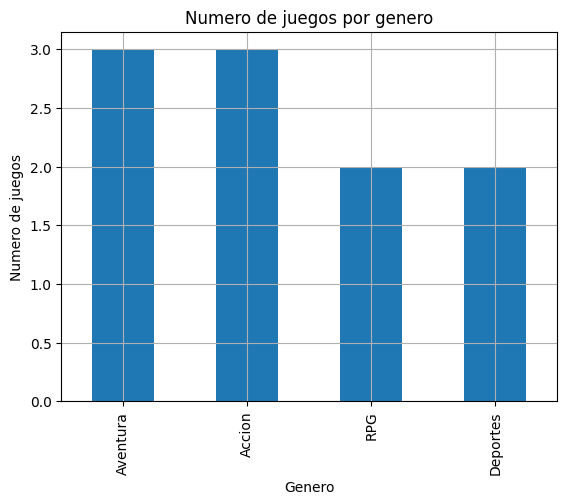

In [152]:
#Número de juegos por genero

juegos_genero = df['genero'].value_counts()
print (juegos_genero)
juegos_genero.plot(kind='bar')
plt.grid(visible=True)
plt.title('Numero de juegos por genero')
plt.xlabel('Genero')
plt.ylabel('Numero de juegos')
plt.show()

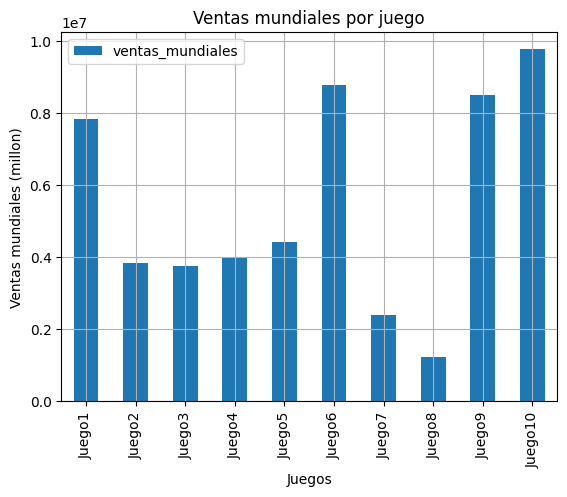

In [151]:
#ventas munduiales por juego
df.plot(x='juego', y='ventas_mundiales', kind='bar')
plt.grid(visible=True)
plt.title('Ventas mundiales por juego')
plt.xlabel('Juegos')
plt.ylabel('Ventas mundiales (millon)')    
plt.show()

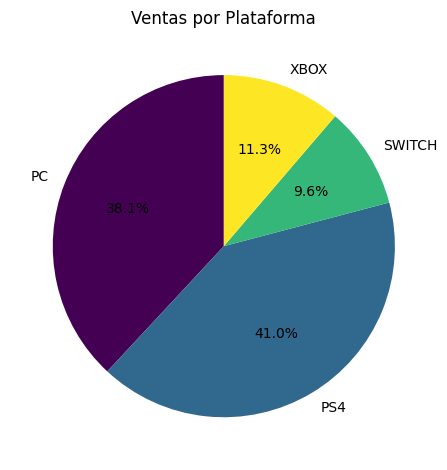

In [119]:
# Ventas totales por plataforma
ventas_por_plataforma = df.groupby('plataformas')['ventas_mundiales'].sum()

ventas_por_plataforma.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
plt.title('Ventas por Plataforma')
plt.ylabel('') 
plt.tight_layout()
plt.show()

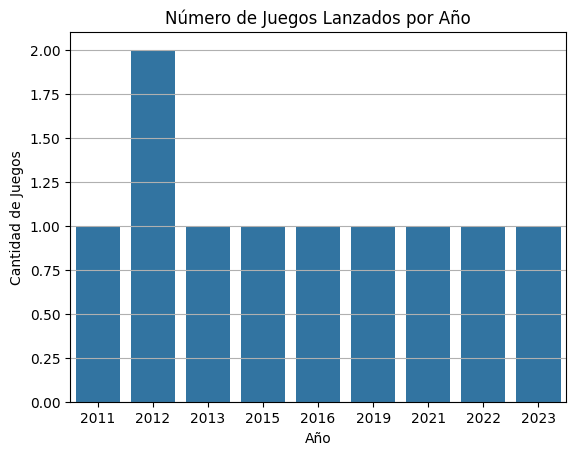

In [153]:
#Lanzamientos de juegos por año

df["year_Lanzamiento"] = df["fecha_lanzamiento"].dt.year #Extraccion año de la fecha de lanzamiento

# Graficar el número de juegos lanzados por año
plt.grid(visible=True)
sns.countplot(x="year_Lanzamiento", data=df)
plt.title("Número de Juegos Lanzados por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Juegos")
plt.show()

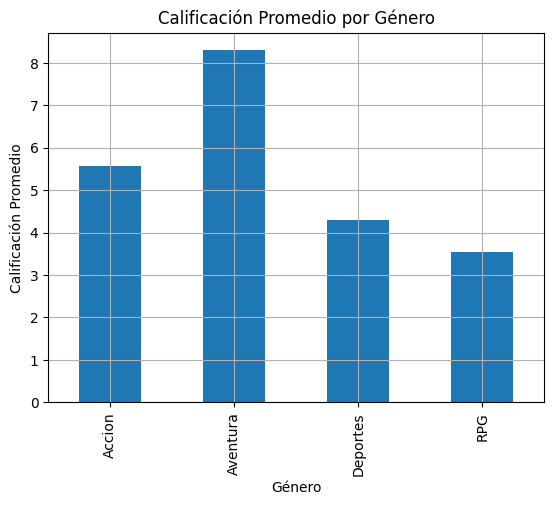

In [154]:
# Calificación promedio por género
calificacion_promedio = df.groupby('genero')['calificacion'].mean()
calificacion_promedio.plot(kind='bar')
plt.title('Calificación Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Calificación Promedio')
plt.grid(visible=True)
plt.show()

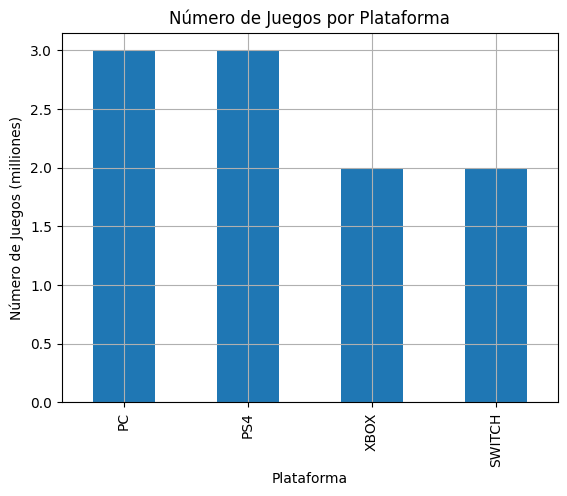

In [155]:
# Número de juegos por plataforma
juegos_por_plataforma = df['plataformas'].value_counts()

juegos_por_plataforma.plot(kind='bar')
plt.title('Número de Juegos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de Juegos (milliones)')
plt.grid(visible=True)
plt.show()

#PREGUNTA 2, LIMPIEZA DE DATOS

R//: Lo primero que se debe de hacer es analizar el conjunto de datos que se va a trabajar, identificar los objetivos y problemas planteados; luego de entender el problema vamos a verificar con el conjuntos de datos, se hace un analisis muy general con .info(), asi entedemos los tipos de datos que se estan usando y la cantidad clasificados con la columna, asi nos daremos cuenta si se encuentran datos faltantes, luego buscaria dentro del df si todos los datos estan almacenados en las columnas correctas, porque hay casos donde hay datos vacios y eso hace que se corran los datos de las columnas.
Ya luego de identificar los datos faltantes en el caso de las columnas Ventas_Mundiales y Calificacion, al ser columnas con datos numericos podria implementar un recorrido de la media de cada columna y lo implementaria para agregar ese valor faltante, dado el caso de que sean muy pocos los valores faltantes dentro del df se podria optar por la opcion de eliminar las filas que tengan vacios, siempre y cuando sea un porcentaje bajo y no represente ningun cambio en analisis del df.
 

Codigo para implementar la media:
col_num = ['ventas_mundiales']

for col in col_num:
    df[col] = df[col].fillna(df[col].mean())
df[col_num].isnull().sum()

Codigo para filas con datos faltantes:
df = df.dropna(subset=['calificacion'])


PARTE 2

In [156]:
#-Pregunta 3-
#Venta promedio de peliculas por año
def avg_ventas_year(df):    
    df['year'] = df['fecha_lanzamiento'].dt.year
    
    # Calcular las ventas promedio por año
    avg_ventas = df.groupby('anio')['ventas_mundiales'].mean()
    
    # Grafico
    plt.figure(figsize=(10, 6))
    plt.plot(avg_ventas.index, avg_ventas.values, marker='o', label='Ventas promedio')
    
    plt.title('Ventas Promedio por Año', fontsize=14)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Ventas Promedio (millon)', fontsize=12)
    plt.grid(visible=True)
    plt.legend()
    plt.tight_layout()
    plt.show()

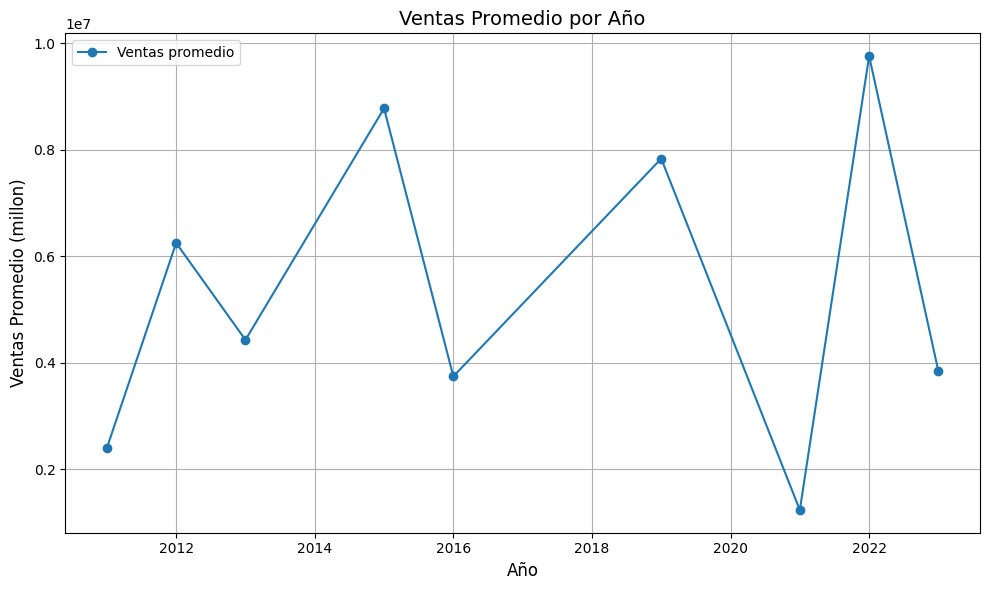

In [157]:
avg_ventas_year(df)

En la grafica se evidencia un patron muy irregular encontrando grandes picos de aumento y de caida en el promedio de ventas.
2011: Durante el año tuvo un gran crecimiento casi triplicando el promedio inicial
2012-2019: Durante ese periodo de tiempo se observa un patron, de caida y crecimiento en el promedio, en los crecimientos puede influir que durante ese periodo de tiempo salieron nuevas consolas al mercado, haciendo esto una gran atraccion a nuevos clientes.
2019-2021: se evidencia la mayor caida en ventas, uno de los mayores factores puede haber sido la pandemia, la economia global durante el confinamiento se vio muy afectada ya que una gran cantidad de empresas cerraron y despidieron a sus empleados, haciendo que el gasto en diversión se viera muy afectado al priorizar en compras de primera necesidad, tambien hubo un gran incremento de juegos gratis en esa epoca que acogieron una gran parte de la poblacion y esto influyo que dejaran de comprar juegos.
2021: Se encuentra el mayor aumento con respecto a los otros años, esto puede ser debido a la recuperacion economica post-pandemia, cuando las personas empezaron a retornar a los empleos y los habitos de consumo, tambien se puede influenciar por la salida de la nueva generacion de consolas como el "PS5".
Si se sigue la misma tendencia es muy probable que para el año 2023 tenga un crecimiento notorio con respecto a la caida presenciada en el año 2022, ya que se logra identificar un patron que despues de cada caida en el promedio viene un crecimiento.

    -Pregunta 4-

Para estructurar los datos de una mejor manera, almacenaria los datos sobre los jugadores con los siguientes datos: (id, nombre, fecha_nacimiento, username, region, pais, historial_compras, horas_jugadas)

Ejemplo:
   {
        "id": col0001,
        "nombre": "Daniel Alejandro Rincón Valencia",
        "fecha_nacimiento": "2001-12-28",
        "username": "danielrincon28",
        "region": "Latam-Norte",
        "pais": "Colombia",
        "historial_compras": [
            {
                "juego": "Juego1",
                "fecha_compra": "2023-01-10",
                "precio": 59.99
            },
            {
                "juego": "Juego2",
                "fecha_compra": "2023-03-05",
                "precio": 49.99
            }
        ],
        "horas_jugadas": 120
    },

-Pregunta 5-

Matriz de correlación:
                  ventas_mundiales  calificacion
ventas_mundiales          1.000000      0.373265
calificacion              0.373265      1.000000


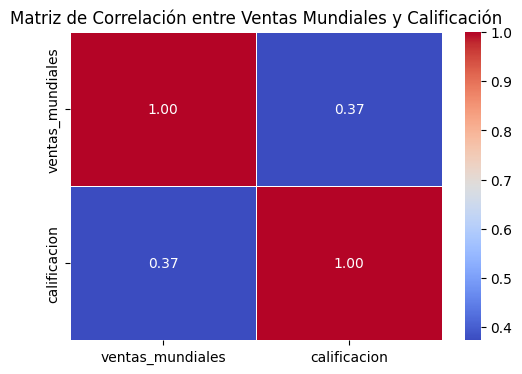

In [ ]:
correlacion = df[['ventas_mundiales', 'calificacion']].corr()
print("Matriz de correlación:")
print(correlacion)

# Matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Ventas Mundiales y Calificación')
plt.show()

Se identifica que ventas_mundiales-calificacion es una correlación positiva baja, significa que la calificación de los juegos es un factor necesario, pero no es de los factores principales para analizar las ventas mundiales de los juegos

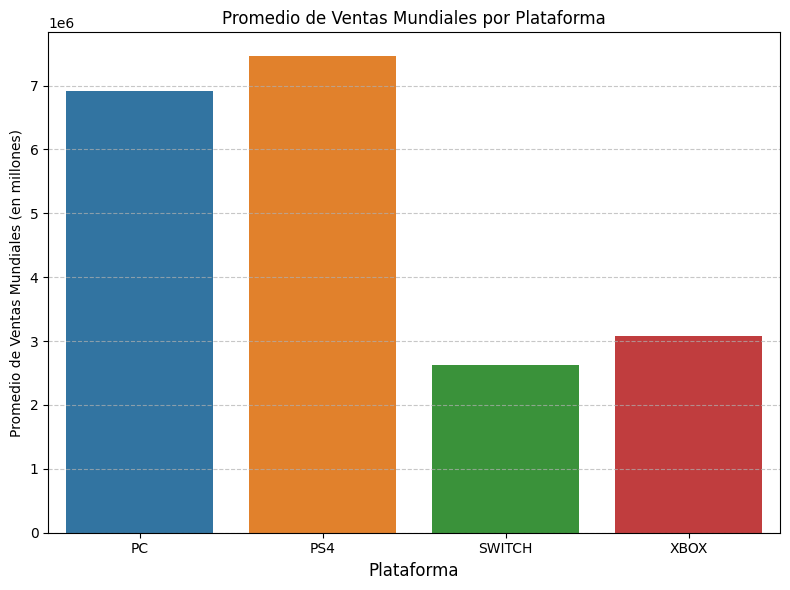

In [159]:
avg_ventas_plataforma = df.groupby('plataformas')['ventas_mundiales'].mean().reset_index()
avg_ventas_plataforma.columns = ['Plataforma', 'Promedio_Ventas']

plt.figure(figsize=(8, 6))
sns.barplot(x='Plataforma', y='Promedio_Ventas', data=avg_ventas_plataforma, hue='Plataforma')
plt.title('Promedio de Ventas Mundiales por Plataforma')
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Promedio de Ventas Mundiales (en millones)')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

--RESUMEN EJECUTIVO--

PS4 lidera las ventas totales, el genero de accion lidera con (23.8M) las ventas y representa el (38%) y solo se distribuyó en PS4. Las ventas fluctuan mucho pero conservan un mismo patron. La economia en pandemia influyó de manera negativa las ventas. El juego10 es de accion, es el mas vendido. El promedio de calificaciones mas altas lo tiene RPG y Aventura. 2012 fue el año con mas cantidad de juego lanzados (2). Las plataformas PC y PS4 son las mas apetecidas. El pico mas alto de ventas fue en el año 2022, influyendo la salida de nuevos juegos y las consolas de nueva generación. La calificación no influye en la cantidad de ventas.

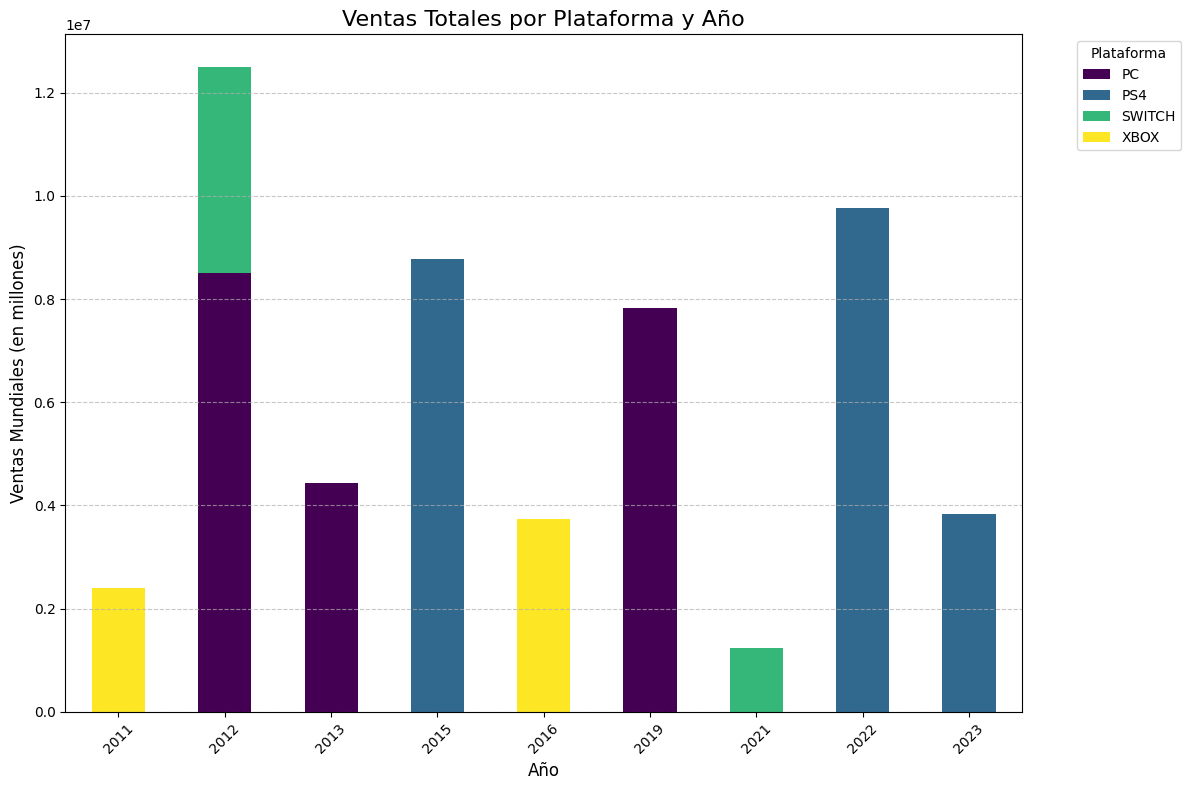

In [165]:
df['anio'] = df['fecha_lanzamiento'].dt.year

ventas_por_plataforma_anio = df.groupby(['anio', 'plataformas'])['ventas_mundiales'].sum().unstack()
ventas_por_plataforma_anio.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Ventas Totales por Plataforma y Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Mundiales (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La visualización mas relevante son las ventas totales de plataformas por año, porque asi podemos tener datos historicos para buscar la manera de mejorar los decrecimientos de algunos años, y buscar nuevas oprtunidades de mejora.